In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('ebay_train.tsv', sep='\t')

In [3]:
train.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


In [4]:
train.shape

(15000000, 19)

In [5]:
train.columns

Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'item_zip', 'buyer_zip',
       'category_id', 'item_price', 'quantity', 'payment_datetime',
       'delivery_date', 'weight', 'weight_units', 'package_size',
       'record_number'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000000 entries, 0 to 14999999
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   b2c_c2c                    object 
 1   seller_id                  int64  
 2   declared_handling_days     float64
 3   acceptance_scan_timestamp  object 
 4   shipment_method_id         int64  
 5   shipping_fee               float64
 6   carrier_min_estimate       int64  
 7   carrier_max_estimate       int64  
 8   item_zip                   object 
 9   buyer_zip                  object 
 10  category_id                int64  
 11  item_price                 float64
 12  quantity                   int64  
 13  payment_datetime           object 
 14  delivery_date              object 
 15  weight                     int64  
 16  weight_units               int64  
 17  package_size               object 
 18  record_number              int64  
dtypes: float64(3), int64(9), object(7)
memor

In [7]:
train.isnull().sum()

b2c_c2c                           0
seller_id                         0
declared_handling_days       702886
acceptance_scan_timestamp         0
shipment_method_id                0
shipping_fee                      0
carrier_min_estimate              0
carrier_max_estimate              0
item_zip                          1
buyer_zip                         1
category_id                       0
item_price                        0
quantity                          0
payment_datetime                  0
delivery_date                     0
weight                            0
weight_units                      0
package_size                      0
record_number                     0
dtype: int64

In [8]:
train['declared_handling_days'].value_counts()

1.0     7847677
2.0     2575363
3.0     2419649
0.0     1012563
5.0      225054
4.0      123179
10.0      61847
15.0      13013
30.0      10909
20.0       7788
40.0         72
Name: declared_handling_days, dtype: int64

In [9]:
train = train.dropna(subset=['declared_handling_days'],axis=0)

In [10]:
train.isnull().sum()

b2c_c2c                      0
seller_id                    0
declared_handling_days       0
acceptance_scan_timestamp    0
shipment_method_id           0
shipping_fee                 0
carrier_min_estimate         0
carrier_max_estimate         0
item_zip                     0
buyer_zip                    0
category_id                  0
item_price                   0
quantity                     0
payment_datetime             0
delivery_date                0
weight                       0
weight_units                 0
package_size                 0
record_number                0
dtype: int64

In [11]:
train["payment_datetime"].dtype

dtype('O')

In [68]:
#edit the time format
train['payment_datetime'] = pd.to_datetime(train['payment_datetime'],format='%Y/%m/%d').dt.date

In [66]:
train['delivery_date']= pd.to_datetime(train['delivery_date'],format='%Y/%m/%d')

In [55]:
#train['acceptance_scan_timestamp']= pd.to_datetime(train['acceptance_scan_timestamp'],format='%Y/%m/%d')

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14297114 entries, 0 to 14999999
Data columns (total 20 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   b2c_c2c                    object        
 1   seller_id                  int64         
 2   declared_handling_days     float64       
 3   acceptance_scan_timestamp  object        
 4   shipment_method_id         int64         
 5   shipping_fee               float64       
 6   carrier_min_estimate       int64         
 7   carrier_max_estimate       int64         
 8   item_zip                   object        
 9   buyer_zip                  object        
 10  category_id                int64         
 11  item_price                 float64       
 12  quantity                   int64         
 13  payment_datetime           object        
 14  delivery_date              datetime64[ns]
 15  weight                     int64         
 16  weight_units               int64  

In [71]:
train['payment_datetime'] = pd.to_datetime(train['payment_datetime'])

In [73]:
#add response column 
train['total_delivery_days'] = train['delivery_date'] - train['payment_datetime']

In [74]:
train = train.drop('payment_date',axis=1)

In [75]:
train.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number,total_delivery_days
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24,2019-03-29,5,1,LETTER,1,5 days
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2,4 days
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3,4 days
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4,5 days
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-27,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5,3 days


In [76]:
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [77]:
#make a copy of data to perform label encoder
train_corr = train.copy()

In [78]:
train_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14297114 entries, 0 to 14999999
Data columns (total 20 columns):
 #   Column                     Dtype          
---  ------                     -----          
 0   b2c_c2c                    object         
 1   seller_id                  int64          
 2   declared_handling_days     float64        
 3   acceptance_scan_timestamp  object         
 4   shipment_method_id         int64          
 5   shipping_fee               float64        
 6   carrier_min_estimate       int64          
 7   carrier_max_estimate       int64          
 8   item_zip                   object         
 9   buyer_zip                  object         
 10  category_id                int64          
 11  item_price                 float64        
 12  quantity                   int64          
 13  payment_datetime           datetime64[ns] 
 14  delivery_date              datetime64[ns] 
 15  weight                     int64          
 16  weight_units    

In [79]:
le = LabelEncoder()

In [80]:
train_corr['b2c_c2c'] = le.fit_transform(train_corr['b2c_c2c'])
train_corr['item_zip'] = le.fit_transform(train_corr['item_zip'])
train_corr['buyer_zip'] = le.fit_transform(train_corr['buyer_zip'])
train_corr['package_size'] = le.fit_transform(train_corr['package_size'])
train_corr['acceptance_scan_timestamp'] = le.fit_transform(train_corr['acceptance_scan_timestamp'])
train_corr['total_delivery_days'] = le.fit_transform(train_corr['total_delivery_days'])

In [81]:
train_data_categorical = train_corr[['b2c_c2c','item_zip','buyer_zip','package_size','acceptance_scan_timestamp','total_delivery_days']]
train_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14297114 entries, 0 to 14999999
Data columns (total 6 columns):
 #   Column                     Dtype
---  ------                     -----
 0   b2c_c2c                    int64
 1   item_zip                   int64
 2   buyer_zip                  int64
 3   package_size               int64
 4   acceptance_scan_timestamp  int64
 5   total_delivery_days        int64
dtypes: int64(6)
memory usage: 763.5 MB


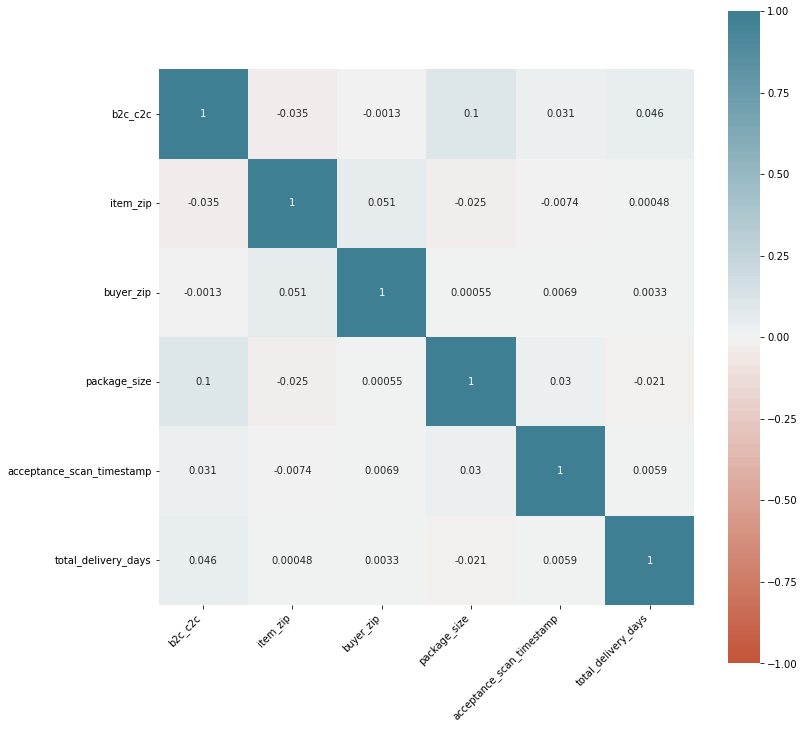

In [82]:
# correlation plot for categorical features
plt.figure(figsize=(12,12))
corr_categorical=train_data_categorical.corr()
ax1 = sns.heatmap(
    corr_categorical, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax1.set_xticklabels(
    ax1.get_xticklabels(),
     rotation=45,
    horizontalalignment='right'
);

In [83]:
train_data_numerical = train_corr[['seller_id','declared_handling_days','shipment_method_id','shipping_fee','carrier_min_estimate','carrier_max_estimate','category_id','item_price','quantity','payment_datetime','delivery_date','weight','weight_units','record_number','total_delivery_days']]
train_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14297114 entries, 0 to 14999999
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   seller_id               int64         
 1   declared_handling_days  float64       
 2   shipment_method_id      int64         
 3   shipping_fee            float64       
 4   carrier_min_estimate    int64         
 5   carrier_max_estimate    int64         
 6   category_id             int64         
 7   item_price              float64       
 8   quantity                int64         
 9   payment_datetime        datetime64[ns]
 10  delivery_date           datetime64[ns]
 11  weight                  int64         
 12  weight_units            int64         
 13  record_number           int64         
 14  total_delivery_days     int64         
dtypes: datetime64[ns](2), float64(3), int64(10)
memory usage: 1.7 GB


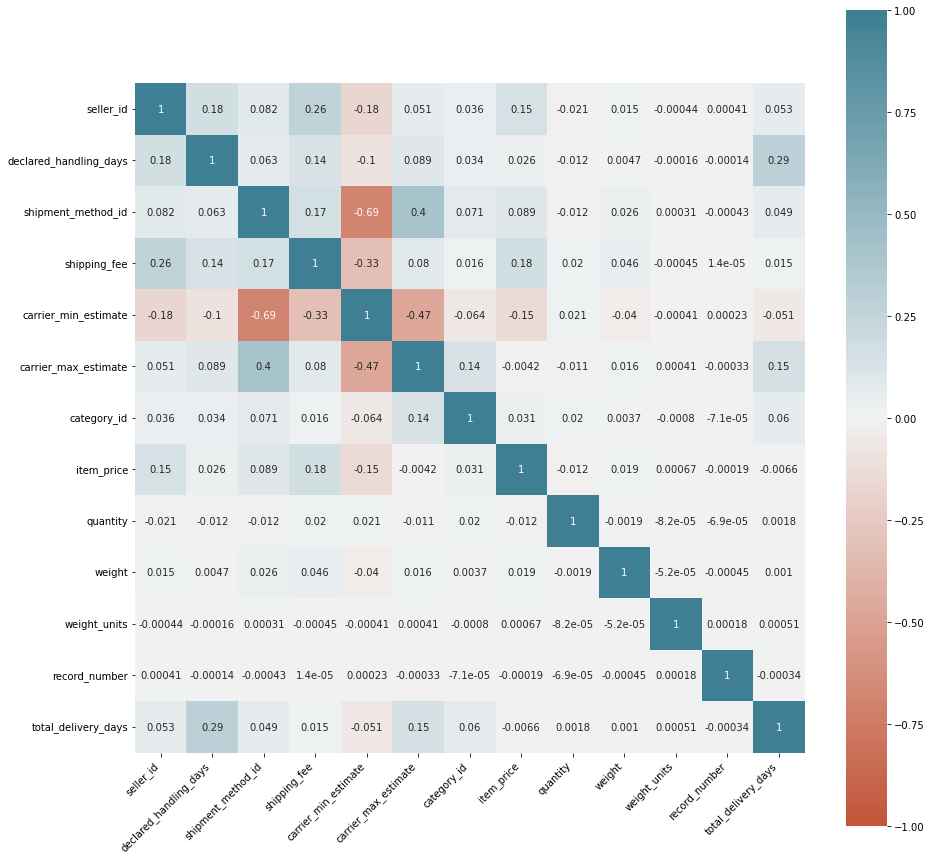

In [84]:
plt.figure(figsize=(15,15))
corr_categorical=train_data_numerical.corr()
ax1 = sns.heatmap(
    corr_categorical, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [88]:
train.to_csv("ebay_train1.csv",index=False)